   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

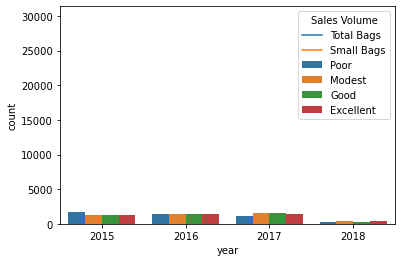

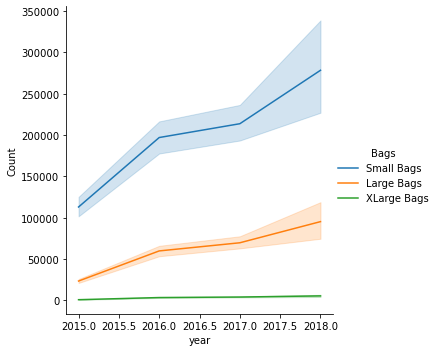

In [1]:
# Import necessary modules
import pandas as pd
import seaborn as sns

# Read avocado.csv into a Pandas DataFrame
df = pd.read_csv('avocado.csv')

# Display the first five rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame and its columns
print(df.info())

# Convert the Date column to the datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the DataFrame and its columns again
print(df.info())

# Filter the data to contain only 2015, conventional type, and Albany region
df_filtered = df.query("year == 2015 and type == 'conventional' and region == 'Albany'")[['Date', 'Total Bags', 'Small Bags']]

# Display the first five rows of the filtered DataFrame
print(df_filtered.head())

# Melt the data in the Total Bags and Small Bags columns
melted_df = pd.melt(df_filtered, id_vars=['Date'], value_vars=['Total Bags', 'Small Bags'], var_name='Bags', value_name='Count')

# Display the melted DataFrame
print(melted_df)

# Plot the melted data with a Seaborn line plot
sns.lineplot(data=melted_df, x='Date', y='Count', hue='Bags')

# Bin the data in the Total Volume column into four quantiles
df['Sales Volume'] = pd.qcut(df['Total Volume'], q=4, labels=['Poor', 'Modest', 'Good', 'Excellent'])

# Display the first five rows of the modified DataFrame
print(df.head())

# Plot the binned data by year
sns.countplot(data=df, x='year', hue='Sales Volume')

# Melt the three bag size columns
melted_df2 = pd.melt(df, id_vars=['year'], value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], var_name='Bags', value_name='Count')

# Display the melted DataFrame
print(melted_df2)

# Plot the bags by year using sns.relplot()
sns.relplot(data=melted_df2, kind='line', x='year', y='Count', hue='Bags')

